In [1]:
# =============================================================================
# Gradient Boosting Algorithm
# =============================================================================


In [2]:
# =============================================================================
# Problem Statement
# Using the Boston Housing Data, predict the prices using Gradient Boosting (XGBoost)
# =============================================================================


In [3]:
# =============================================================================
# Preparing the Enviornment
# ================================================================

In [4]:
!pip install xgboost

In [1]:
from sklearn.datasets import load_boston # skylarn inbuild dataset
import pandas as pd #data handaling
#from xgboost import XGBClassifier #
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import matplotlib as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# =============================================================================
# Loading the Data
# =============================================================================

In [3]:
#import it from scikit-learn 
boston = load_boston()
print(boston.keys()) #boston variable itself is a dictionary, so you can check for its keys using the .keys() method.
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

In [49]:
# DEscription of column names

In [50]:
#Data Set Characteristics:**  
#   :Number of Instances: 506 
#
#    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
#
#    :Attribute Information (in order):
#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000
#        - PTRATIO  pupil-teacher ratio by town
#        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
#        - LSTAT    % lower status of the population
#        - MEDV     Median value of owner-occupied homes in $1000's


In [51]:

# =============================================================================
# Exploraotry Data Analysis
# =============================================================================


In [4]:
data = pd.DataFrame(boston.data) # import data frame
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
data.columns = boston.feature_names #add the coloumn name
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
data['PRICE'] = boston.target #Dependent Variable added and total column will be 14
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [56]:
stats = pd.DataFrame(data.describe())
stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [58]:
#Separate the target variable and rest of the variables using .iloc to subset the data.
X, y = data.iloc[:,:-1],data.iloc[:,-1]
#X=independent 
#y=dependent

In [59]:
#XGBoost supports and gives it acclaimed performance and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=y) # This faster then general matriix


In [60]:

# =============================================================================
# Hyper Parameters in XGBoost

#learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
#max_depth: determines how deeply each tree is allowed to grow during any boosting round.
#subsample: percentage of samples used per tree. Low value can lead to underfitting.
#colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
#n_estimators: number of trees you want to build.
#objective: determines the loss function to be used like reg:linear for regression problem
#reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability

# =============================================================================


In [61]:

# =============================================================================
# Regualarization Parameters
# gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
# alpha: L1 regularization on leaf weights. A large value leads to more regularization.
# lambda: L2 regularization on leaf weights and is smoother than L1 regularization.
# =============================================================================


In [62]:
#Splitting the Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#randon_state(any number)-->It ensure Reproductivity of model

In [73]:
#collecting the xgboost regression/Define the instance
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 20, n_estimators = 1000)

#xg_reg = xgb.XGBRegressor(n_estimators = 10)

In [69]:
#collecting the xgboost regression/Define the instance[iteration=2]
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth =20, alpha = 20, n_estimators = 10000)

In [74]:
#fitting theXgb in traning data
xg_reg.fit(X_train,y_train)


[21:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=20, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [71]:
# Train Error
preds_train = xg_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
print("TRAIN RMSE: %f" % (rmse_train))


TRAIN RMSE: 1.616594


In [75]:
#Train error
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 3.949891


In [43]:
#running a adaboost model
ada_reg = AdaBoostRegressor(n_estimators = 10)

ada_reg.fit(X_train,y_train)

preds_ada = ada_reg.predict(X_test)
rmse_ada = np.sqrt(mean_squared_error(y_test, preds_ada))
print("RMSE: %f" % (rmse_ada))


RMSE: 3.784477


In [ ]:
# =============================================================================
# Cross Validation:
#num_boost_round: denotes the number of trees you build (analogous to n_estimators)
#metrics: tells the evaluation metrics to be watched during CV
#as_pandas: to return the results in a pandas DataFrame.
#early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
#seed: for reproducibility of results.
# =============================================================================


In [76]:
#k-fold Cross Validation using XGBoost 
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10} #discanary parameter used


In [78]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head(10)

[21:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750757,0.036152,21.765522,0.028850
1,19.778532,0.077649,19.830760,0.031761
2,18.052811,0.118632,18.157337,0.116038
3,16.458958,0.169188,16.623975,0.191413
4,15.074781,0.183545,15.254608,0.213613
5,13.791093,0.216903,14.031676,0.250689
6,12.588551,0.184167,12.855076,0.235383
7,11.595904,0.184370,11.918408,0.259773
8,10.630265,0.156457,11.017994,0.236794
9,9.824976,0.202503,10.252324,0.269036


In [79]:
print((cv_results["test-rmse-mean"]).tail(1))


xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=50)


49    3.99692
Name: test-rmse-mean, dtype: float64
[21:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# =============================================================================
# Final Model
# =============================================================================

ImportError: You must install graphviz to plot tree

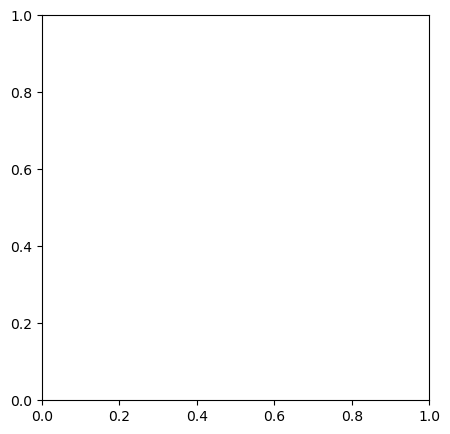

In [86]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg, num_trees=15)
plt.rcParams['figure.figsize']=('70','30')
plt.show()

In [ ]:
# =============================================================================
# Feature Importance 
# =============================================================================


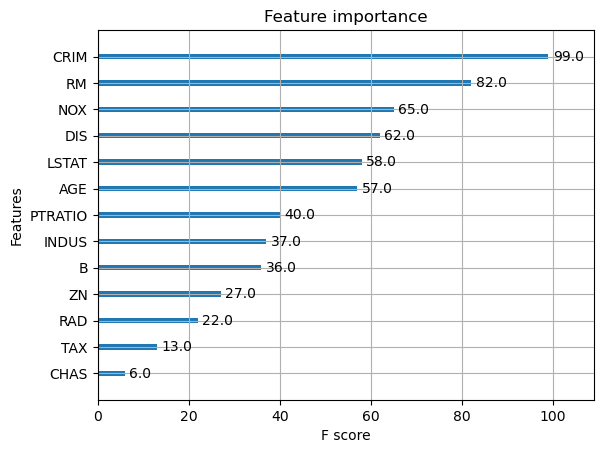

In [83]:

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
